In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as numpy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk


In [63]:
# bring in BA_reviews_v2.csv as a workable DataFrame

brit_air_df = pd.read_csv("data/BA_reviews_v2.csv", index_col= 0)
brit_air_df.head()

,overall_score,reviewer_name,publish_date,review_text,verified,aircraft,traveller_type,seat_type,depart_location,arrival_location,date_flown,seat_comfort_rating,cbn_staff_rating,food_and_bev_rating,inflight_ent_rating,ground_rating,$_value_rating,wifi_conn_rating,recommended
0,1.0,E Gan,2024-01-02,✅ Trip Verified | My son and I flew to Geneva...,1,NaN,Family Leisure,Business Class,Gatwick,Geneva,2023-12-01,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,8.0,S Dayle,2023-12-29,✅ Trip Verified | For the price paid (bought ...,1,A320,Solo Leisure,Business Class,Istanbul,London Heathrow,2023-12-01,1.0,4.0,5.0,1.0,2.0,4.0,NaN,1
2,6.0,S Neale,2023-12-29,✅ Trip Verified | Flight left on time and arr...,1,A320,Solo Leisure,Economy Class,London Heathrow,Istanbul,2023-12-01,3.0,2.0,1.0,1.0,5.0,2.0,NaN,0
3,2.0,Mick Carter,2023-12-27,✅ Trip Verified | Very Poor Business class pr...,1,Boeing 777,Business,Business Class,Gatwick,St Lucia,2023-12-01,1.0,5.0,2.0,2.0,1.0,2.0,2.0,0
4,5.0,Colin Wicks,2023-12-27,Not Verified | This review is for LHR-SYD-LHR....,0,Boeing 777,Couple Leisure,Business Class,Sydney,London Heathrow,2023-12-01,5.0,3.0,1.0,3.0,3.0,3.0,NaN,0


In [64]:
# Understanding the data

brit_air_df.info()

# Thoughts: Need to change publish_date and date_flown to be datetime, can look at it temporally.
# use histograms on ratings to find out distribution.
# find out if correlation between seat_type and recommendations, or seat_comfort, etc.
# create a wordcloud (don't forget to exclude "Trip Verified" or "Not Verified") to visually spot common words, then
# separate by positive and negative reviews.


<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 0 to 3727
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall_score        3723 non-null   float64
 1   reviewer_name        3728 non-null   object 
 2   publish_date         3728 non-null   object 
 3   review_text          3728 non-null   object 
 4   verified             3728 non-null   int64  
 5   aircraft             1940 non-null   object 
 6   traveller_type       2957 non-null   object 
 7   seat_type            3726 non-null   object 
 8   depart_location      2953 non-null   object 
 9   arrival_location     2938 non-null   object 
 10  date_flown           2950 non-null   object 
 11  seat_comfort_rating  3611 non-null   float64
 12  cbn_staff_rating     3599 non-null   float64
 13  food_and_bev_rating  3337 non-null   float64
 14  inflight_ent_rating  2570 non-null   float64
 15  ground_rating        2882 non-null   float6

In [65]:
# Change review_text values to exclude "✅ Trip Verified |" and "Not Verified |"

brit_air_df['review_text'] = brit_air_df['review_text'].str.replace("✅ Trip Verified |","").str.replace("Not Verified |","").str.strip()

brit_air_df['review_text']

0       My son and I flew to Geneva last Sunday for a ...
1       For the price paid (bought during a sale) it w...
2       Flight left on time and arrived over half an h...
3       Very Poor Business class product, BA is not ev...
4       This review is for LHR-SYD-LHR. BA015 and BA01...
                              ...                        
3723    LHR-JFK-LAX-LHR. Check in was ok apart from be...
3724    LHR to HAM. Purser addresses all club passenge...
3725    My son who had worked for British Airways urge...
3726    London City-New York JFK via Shannon on A318 b...
3727    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: review_text, Length: 3728, dtype: object

## Word Cloud Creation

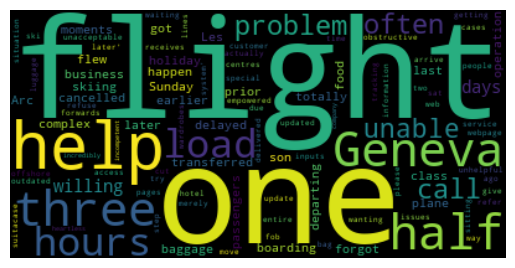

In [66]:
# WordCloud test with one instance.

text = brit_air_df.review_text[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
# Cool, now for the whole thing

# First, combine all reviews into a fat word clump.

text = " ".join(review for review in brit_air_df.review_text)
print(f"There are \033[1m{len(text):,d}\033[0m words in the 'text' value")

There are 3,314,317 words in the 'text' value


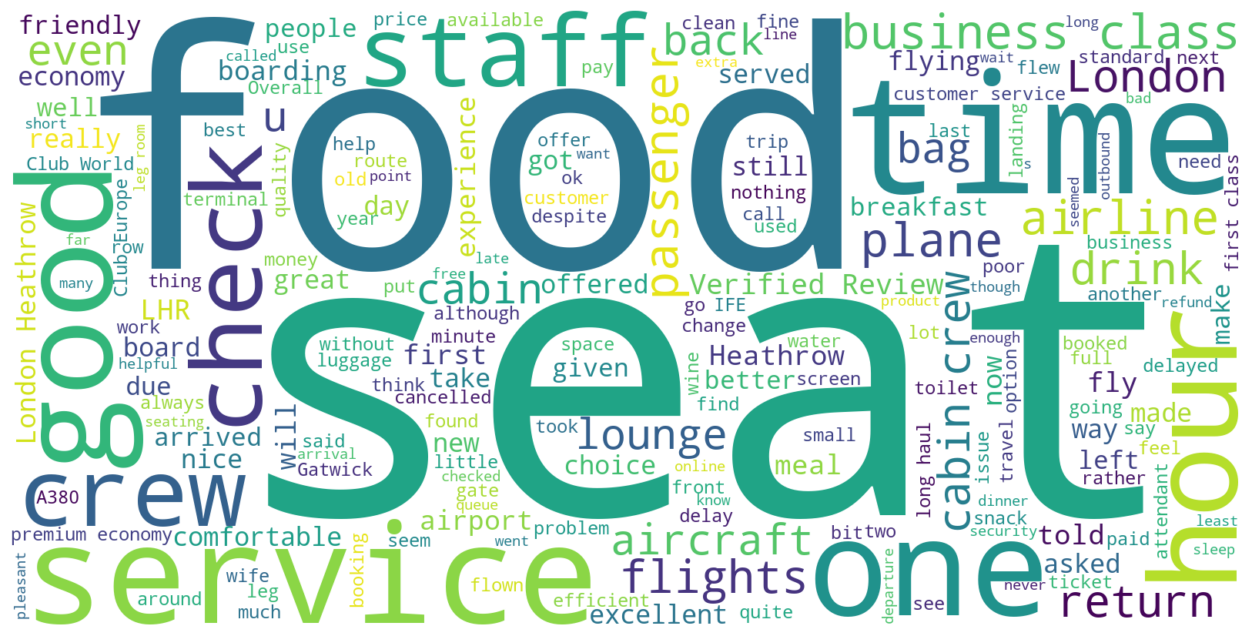

In [68]:
# Next, create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight","British","Airway","Airways","BA"])

#Now, generate a wordcloud
wordcloud = WordCloud(stopwords= stopwords, background_color= "white",width= 1600, height= 800).generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Findings: "seat", "food", "time" stuck out the most. "service", "crew", "staff" were the next most used. 

## Sentiment Analysis

In [69]:
# create the Sentiment Intensity Analyzer object (download vader_lexicon if need be)

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emagp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
sia

In [71]:
# Try out SIA on a single instance

print(brit_air_df['review_text'][0])
print(brit_air_df['overall_score'][0])
sia.polarity_scores(brit_air_df['review_text'][0])

My son and I flew to Geneva last Sunday for a skiing holiday in Les Arc. The flight was cancelled moments prior to boarding and we were transferred to a flight departing three and a half hours later, that then got delayed by a further three hours. They didn't load any food on to the plane and forgot to load the baggage for all the business class passengers who had been on the earlier flight. Problems happen, it's a complex operation. What is totally unacceptable is the service one receives when there is a problem. The offshore call centres are unhelpful and obstructive, wanting to fob off issues by getting the customer to call special help lines that merely refer one to a webpage and then cut off. The web pages are often unable to give information as they are not updated and often refuse to update your inputs 'at this time. please try again later'. There is no access to people that are willing to help, empowered to help, or actually move a situation forwards in any way. We've been sitt

{'neg': 0.101, 'neu': 0.837, 'pos': 0.062, 'compound': -0.8462}

In [72]:
# Cool, now we loop through the DataFrame and create new columns w/ the Vader scores

results = {}
for i, row in brit_air_df.iterrows():
    text = row['review_text']
    results[i] = sia.polarity_scores(text)

vaders = pd.DataFrame(results).T

In [73]:
vaders

,neg,neu,pos,compound
0,0.101,0.837,0.062,-0.8462
1,0.050,0.864,0.086,0.7708
2,0.128,0.857,0.015,-0.9531
3,0.130,0.808,0.062,-0.7082
4,0.024,0.880,0.096,0.9044
...,...,...,...,...
3723,0.067,0.877,0.056,-0.2003
3724,0.000,0.712,0.288,0.8720
3725,0.056,0.875,0.069,0.4516
3726,0.000,0.711,0.289,0.9148


In [74]:
brit_air_vaders_df = pd.merge(brit_air_df, vaders, left_index= True, right_index= True)

In [75]:
# Now we have a DataFrame that has Vaders sentiment scores appended to original data.

brit_air_vaders_df.head()

,overall_score,reviewer_name,publish_date,review_text,verified,aircraft,traveller_type,seat_type,depart_location,arrival_location,...,food_and_bev_rating,inflight_ent_rating,ground_rating,$_value_rating,wifi_conn_rating,recommended,neg,neu,pos,compound
0,1.0,E Gan,2024-01-02,My son and I flew to Geneva last Sunday for a ...,1,NaN,Family Leisure,Business Class,Gatwick,Geneva,...,1.0,1.0,1.0,1.0,1.0,0,0.101,0.837,0.062,-0.8462
1,8.0,S Dayle,2023-12-29,For the price paid (bought during a sale) it w...,1,A320,Solo Leisure,Business Class,Istanbul,London Heathrow,...,5.0,1.0,2.0,4.0,NaN,1,0.050,0.864,0.086,0.7708
2,6.0,S Neale,2023-12-29,Flight left on time and arrived over half an h...,1,A320,Solo Leisure,Economy Class,London Heathrow,Istanbul,...,1.0,1.0,5.0,2.0,NaN,0,0.128,0.857,0.015,-0.9531
3,2.0,Mick Carter,2023-12-27,"Very Poor Business class product, BA is not ev...",1,Boeing 777,Business,Business Class,Gatwick,St Lucia,...,2.0,2.0,1.0,2.0,2.0,0,0.130,0.808,0.062,-0.7082
4,5.0,Colin Wicks,2023-12-27,This review is for LHR-SYD-LHR. BA015 and BA01...,0,Boeing 777,Couple Leisure,Business Class,Sydney,London Heathrow,...,1.0,3.0,3.0,3.0,NaN,0,0.024,0.880,0.096,0.9044


## Plot Vaders to verify

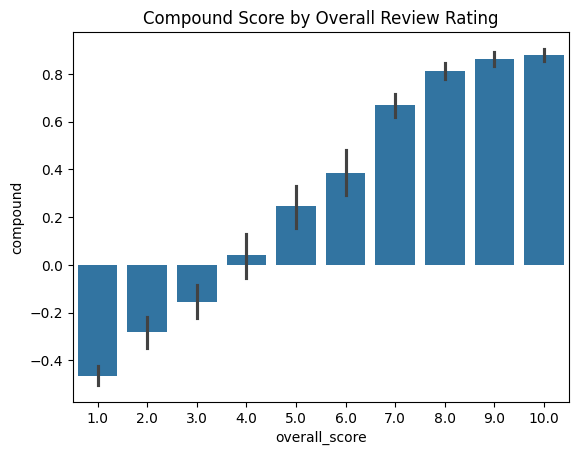

In [76]:
# Using seaborn barplot to visually verify if sentiment scores line up w/ overall scores

ax = sns.barplot(data = brit_air_vaders_df, x = 'overall_score', y = 'compound')
ax.set_title('Compound Score by Overall Review Rating')
plt.show()

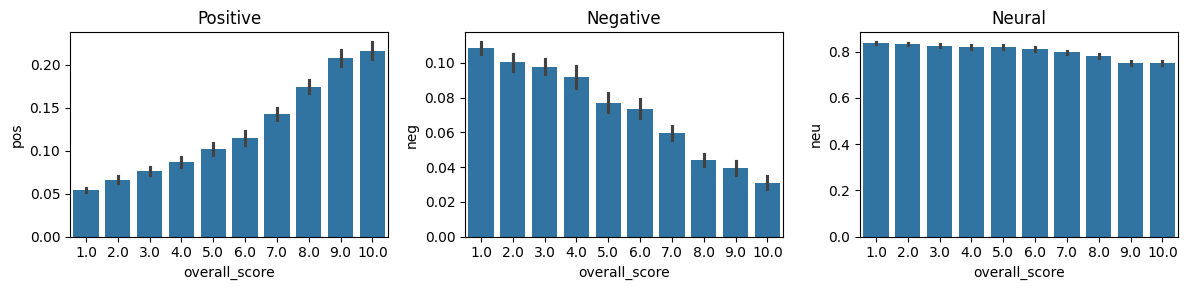

In [77]:
# Use seaborn barplot and matplotlib subplot to plot out 'pos', 'neg' and 'neu' scores

fig, axs = plt.subplots(1,3,figsize = (12,3))
sns.barplot(data = brit_air_vaders_df, x = 'overall_score', y = 'pos', ax = axs[0])
sns.barplot(data = brit_air_vaders_df, x = 'overall_score', y = 'neg', ax = axs[1])
sns.barplot(data = brit_air_vaders_df, x = 'overall_score', y = 'neu', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neural')
plt.tight_layout()
plt.show()

# We can see the relationships between all three types of sentiment intesity scores and overall_scores. 
# The larger the 'pos' score, the higher the overall_score. 
# The larger the 'neg' score, the lower the overall_score.
# For 'neu', it isn't affected by the overall_score. 

## Word Clouds Specificity

### Let's create word clouds for positive reviews (overall score is 7 and above), negative reviews (overall score is 3 and below), and neutral reviews (overall score is 4 to 6)

In [80]:
# First, let's do positive reviews

positive_reviews = brit_air_vaders_df.query("overall_score >= 7")
positive_reviews['overall_score'].value_counts()

overall_score
8.0     374
10.0    328
7.0     316
9.0     314
Name: count, dtype: int64

In [84]:
text = " ".join(review for review in positive_reviews.review_text)
print(f"There are \033[1m{len(text):,d}\033[0m words in the 'text' value")

There are 989,261 words in the 'text' value


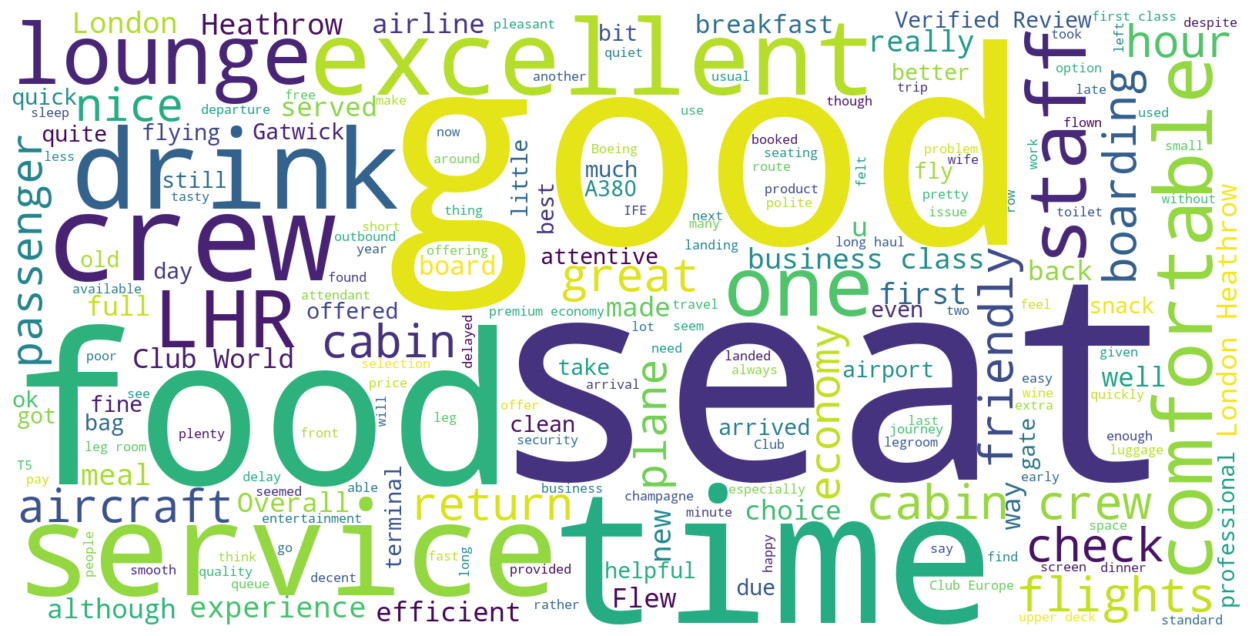

In [82]:
# Next, create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight","British","Airway","Airways","BA"])

#Now, generate a wordcloud
wordcloud = WordCloud(stopwords= stopwords, background_color= "white",width= 1600, height= 800).generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [83]:
# Repeat for negative reviews

negative_reviews = brit_air_vaders_df.query("overall_score <= 3")
negative_reviews['overall_score'].value_counts()

overall_score
1.0    873
2.0    426
3.0    408
Name: count, dtype: int64

In [85]:
text = " ".join(review for review in negative_reviews.review_text)
print(f"There are \033[1m{len(text):,d}\033[0m words in the 'text' value")

There are 1,682,486 words in the 'text' value


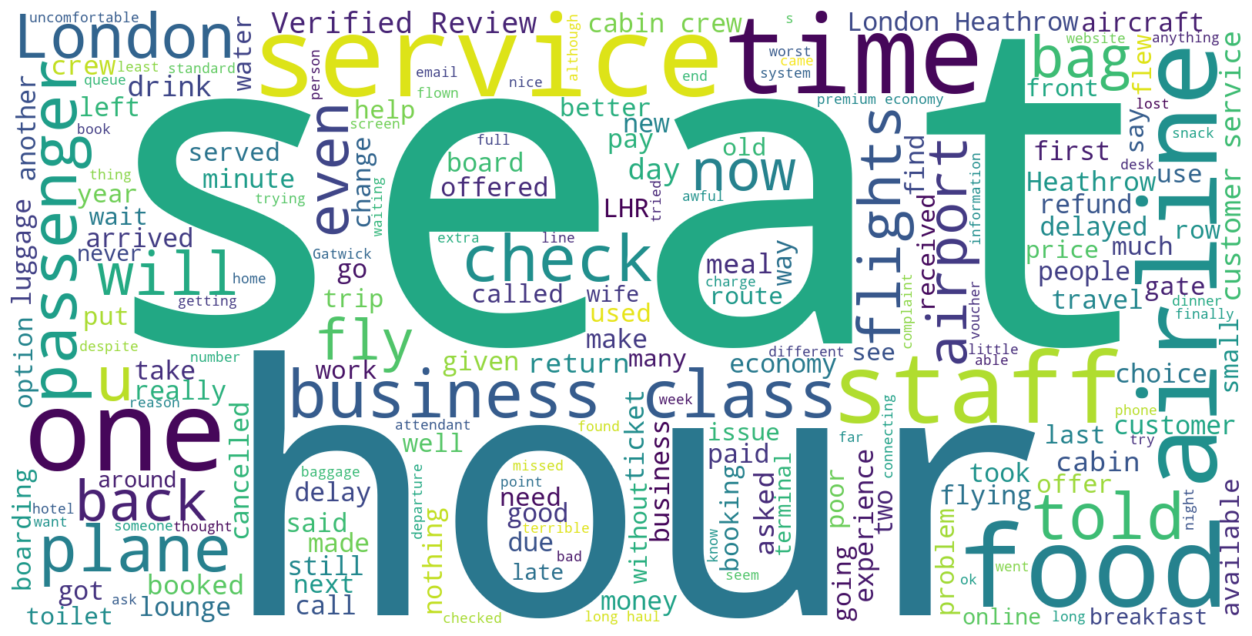

In [86]:
#Now, generate a wordcloud
wordcloud = WordCloud(stopwords= stopwords, background_color= "white",width= 1600, height= 800).generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [87]:
# Finally, neutral reviews.

neutral_reviews = brit_air_vaders_df.query("overall_score > 3 and overall_score < 7")
neutral_reviews['overall_score'].value_counts()

overall_score
4.0    254
5.0    237
6.0    193
Name: count, dtype: int64

In [88]:
text = " ".join(review for review in neutral_reviews.review_text)
print(f"There are \033[1m{len(text):,d}\033[0m words in the 'text' value")

There are 638,665 words in the 'text' value


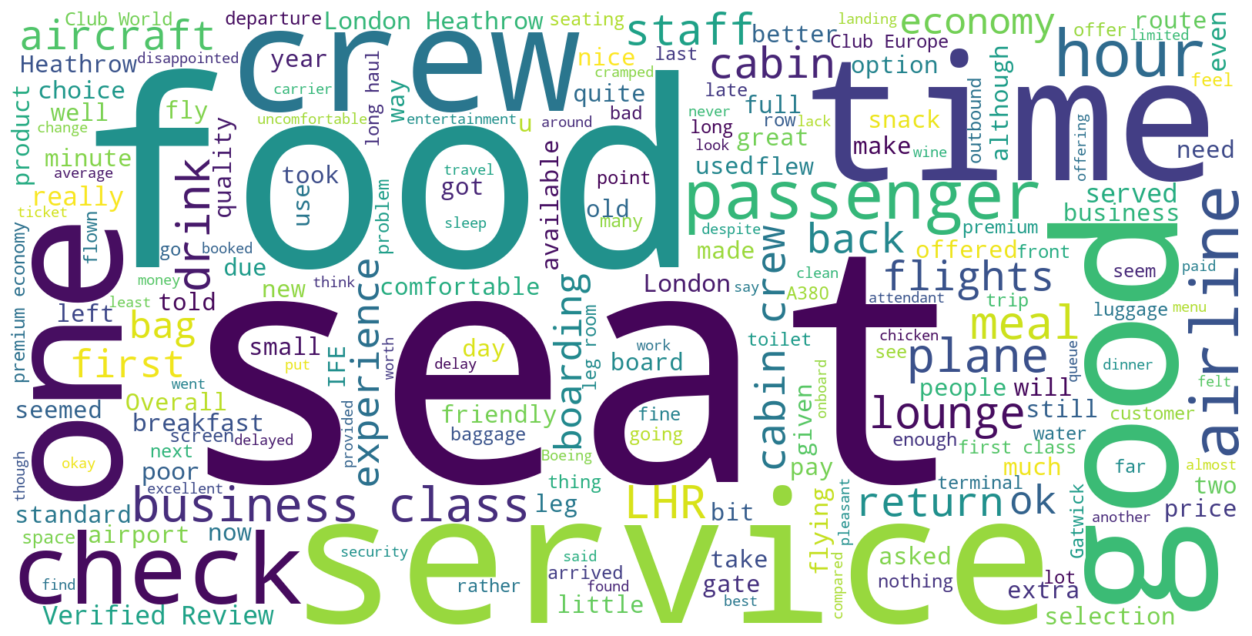

In [89]:
#Now, generate a wordcloud
wordcloud = WordCloud(stopwords= stopwords, background_color= "white",width= 1600, height= 800).generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: >

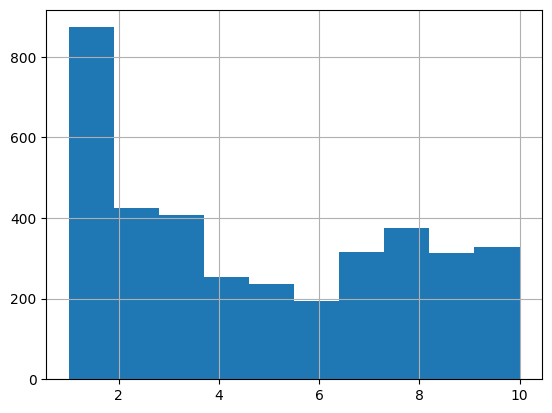

In [91]:
# Histogram of overall_scores

brit_air_vaders_df['overall_score'].hist()